In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('banglore house.csv')
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [5]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

<Axes: >

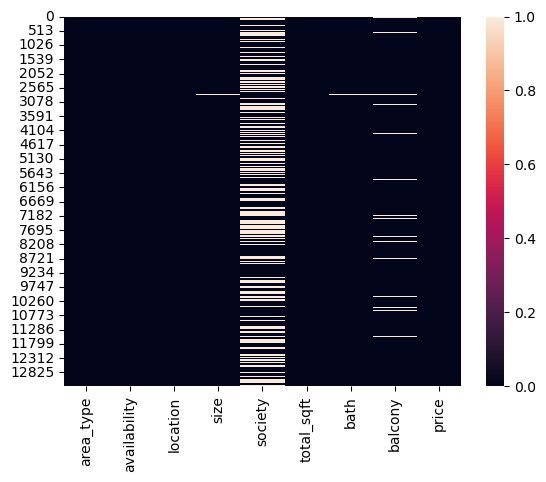

In [6]:
sns.heatmap(df.isnull())

In [7]:
## <--------Handling Null Values of Float features.......>

f=df.select_dtypes(include=['float'])
f

,bath,balcony,price
0,2.0,1.0,39.07
1,5.0,3.0,120.00
2,2.0,3.0,62.00
3,3.0,1.0,95.00
4,2.0,1.0,51.00
...,...,...,...
13315,4.0,0.0,231.00
13316,5.0,NaN,400.00
13317,2.0,1.0,60.00
13318,4.0,1.0,488.00


In [8]:
df.select_dtypes(include='float').isnull().sum()/df.shape[0]*100

bath       0.548048
balcony    4.572072
price      0.000000
dtype: float64

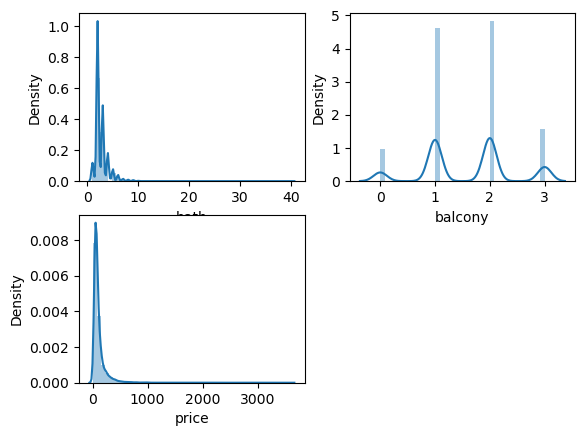

In [9]:
for i,feat in enumerate(f):
    plt.subplot(2,2,i+1)
    sns.distplot(df[feat])
plt.show()

In [10]:
for i in df.select_dtypes(include=['float']).columns:
    df[i].fillna(df[i].median(),inplace=True)
    

In [11]:
df.isnull().sum()  ## Here we can Observe that NaN values from the Float Features get removed.

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath               0
balcony            0
price              0
dtype: int64

In [12]:
df.select_dtypes(include=['object']).columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft'],
      dtype='object')

In [13]:
## Lets removing string characters from the size feature......>

df['size']=df['size'].str.replace('BHK','')
df['size']=df['size'].str.replace('Bedroom','')
df['size']=df['size'].str.replace('RK','')

In [14]:
df['size'].value_counts()

size
2      5528
3      4857
4      1417
1       656
5       356
6       221
7       100
8        89
9        54
10       14
11        4
27        1
19        1
16        1
43        1
14        1
12        1
13        1
18        1
Name: count, dtype: int64

In [15]:
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4,NaN,3600,5.0,2.0,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4,SollyCl,4689,4.0,1.0,488.00


In [16]:
## Hence we can observed that string characters from the size feature is removed , now this feature is turns into integer type.
## Let's converting it into Float Type.

In [17]:
df['size']=df['size'].astype(float)

In [18]:
df['size'].fillna(df['size'].median(),inplace=True)

In [19]:
df['size'].isnull().sum()

0

In [20]:
df['size'].value_counts()

size
2.0     5528
3.0     4873
4.0     1417
1.0      656
5.0      356
6.0      221
7.0      100
8.0       89
9.0       54
10.0      14
11.0       4
27.0       1
19.0       1
16.0       1
43.0       1
14.0       1
12.0       1
13.0       1
18.0       1
Name: count, dtype: int64

In [21]:
df['total_sqft'].value_counts()

total_sqft
1200    843
1100    221
1500    205
2400    196
600     180
       ... 
3580      1
2461      1
1437      1
2155      1
4689      1
Name: count, Length: 2117, dtype: int64

In [22]:
l=list(df['total_sqft'])
l

['1056',
 '2600',
 '1440',
 '1521',
 '1200',
 '1170',
 '2732',
 '3300',
 '1310',
 '1020',
 '1800',
 '2785',
 '1000',
 '1100',
 '2250',
 '1175',
 '1180',
 '1540',
 '2770',
 '1100',
 '600',
 '1755',
 '2800',
 '1767',
 '510',
 '1250',
 '660',
 '1610',
 '1151',
 '1025',
 '2100 - 2850',
 '1075',
 '1760',
 '1693',
 '1925',
 '700',
 '1070',
 '1724',
 '1290',
 '1143',
 '1296',
 '1254',
 '600',
 '660',
 '1330.74',
 '600',
 '970',
 '1459',
 '800',
 '869',
 '1270',
 '1670',
 '2010',
 '1185',
 '1600',
 '1200',
 '3010 - 3410',
 '1500',
 '1407',
 '840',
 '4395',
 '845',
 '5700',
 '1160',
 '3000',
 '1100',
 '1140',
 '1220',
 '1350',
 '1005',
 '500',
 '1358',
 '1569',
 '1240',
 '2089',
 '1206',
 '1150',
 '2511',
 '460',
 '4400',
 '1660',
 '2957 - 3450',
 '1326',
 '1325',
 '1499',
 '3000',
 '1665',
 '708',
 '1060',
 '710',
 '1000',
 '1000',
 '1450',
 '1200',
 '1296',
 '1540',
 '2894',
 '1330',
 '1200',
 '1200',
 '2502',
 '650',
 '2400',
 '1007',
 '1200',
 '966',
 '1630',
 '1640',
 '782',
 '1260',
 '180

In [23]:
l1=[]
for i in l:
    k=''
    for j in i:
        if j.isdigit():
            k=k+j
    l1.append(k)
        
l1

['1056',
 '2600',
 '1440',
 '1521',
 '1200',
 '1170',
 '2732',
 '3300',
 '1310',
 '1020',
 '1800',
 '2785',
 '1000',
 '1100',
 '2250',
 '1175',
 '1180',
 '1540',
 '2770',
 '1100',
 '600',
 '1755',
 '2800',
 '1767',
 '510',
 '1250',
 '660',
 '1610',
 '1151',
 '1025',
 '21002850',
 '1075',
 '1760',
 '1693',
 '1925',
 '700',
 '1070',
 '1724',
 '1290',
 '1143',
 '1296',
 '1254',
 '600',
 '660',
 '133074',
 '600',
 '970',
 '1459',
 '800',
 '869',
 '1270',
 '1670',
 '2010',
 '1185',
 '1600',
 '1200',
 '30103410',
 '1500',
 '1407',
 '840',
 '4395',
 '845',
 '5700',
 '1160',
 '3000',
 '1100',
 '1140',
 '1220',
 '1350',
 '1005',
 '500',
 '1358',
 '1569',
 '1240',
 '2089',
 '1206',
 '1150',
 '2511',
 '460',
 '4400',
 '1660',
 '29573450',
 '1326',
 '1325',
 '1499',
 '3000',
 '1665',
 '708',
 '1060',
 '710',
 '1000',
 '1000',
 '1450',
 '1200',
 '1296',
 '1540',
 '2894',
 '1330',
 '1200',
 '1200',
 '2502',
 '650',
 '2400',
 '1007',
 '1200',
 '966',
 '1630',
 '1640',
 '782',
 '1260',
 '1800',
 '1413

In [24]:
df['total_sqf']=l1
df.drop(columns=['total_sqft'],inplace=True)

In [25]:
df['total_sqf']=df['total_sqf'].astype('float')

In [26]:
df

,area_type,availability,location,size,society,bath,balcony,price,total_sqf
0,Super built-up Area,19-Dec,Electronic City Phase II,2.0,Coomee,2.0,1.0,39.07,1056.0
1,Plot Area,Ready To Move,Chikka Tirupathi,4.0,Theanmp,5.0,3.0,120.00,2600.0
2,Built-up Area,Ready To Move,Uttarahalli,3.0,NaN,2.0,3.0,62.00,1440.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3.0,Soiewre,3.0,1.0,95.00,1521.0
4,Super built-up Area,Ready To Move,Kothanur,2.0,NaN,2.0,1.0,51.00,1200.0
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5.0,ArsiaEx,4.0,0.0,231.00,3453.0
13316,Super built-up Area,Ready To Move,Richards Town,4.0,NaN,5.0,2.0,400.00,3600.0
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2.0,Mahla T,2.0,1.0,60.00,1141.0
13318,Super built-up Area,18-Jun,Padmanabhanagar,4.0,SollyCl,4.0,1.0,488.00,4689.0


In [27]:
df.isnull().sum()

area_type          0
availability       0
location           1
size               0
society         5502
bath               0
balcony            0
price              0
total_sqf          0
dtype: int64

In [28]:
df['society'].isnull().sum()/df['society'].shape[0]*100

41.306306306306304

In [29]:
df['society'].value_counts()

society
GrrvaGr    80
PrarePa    76
Sryalan    59
Prtates    59
GMown E    56
           ..
Amionce     1
JaghtDe     1
Jauraht     1
Brity U     1
RSntsAp     1
Name: count, Length: 2688, dtype: int64

In [30]:
df.drop(columns='society',inplace=True)

In [31]:
df['location'].fillna(df['location'].mode()[0],inplace=True)

In [32]:
df.isnull().sum()

area_type       0
availability    0
location        0
size            0
bath            0
balcony         0
price           0
total_sqf       0
dtype: int64

<Axes: >

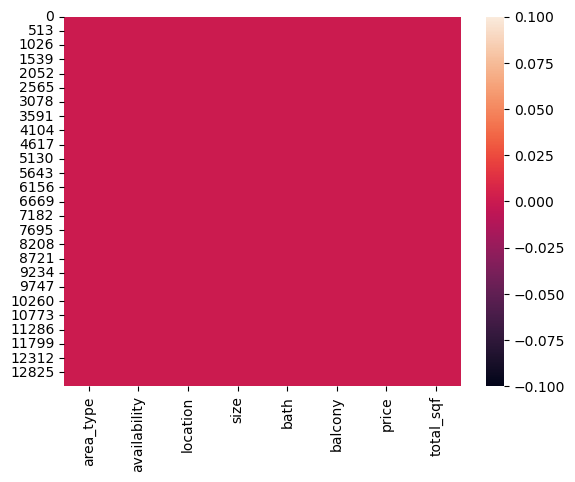

In [33]:
sns.heatmap(df.isnull())

In [184]:
df.describe()

,size,bath,balcony,price,total_sqf
count,13320.000000,13320.000000,13320.000000,13320.000000,1.332000e+04
mean,2.803979,2.688814,1.603378,112.565627,5.885584e+07
std,1.294214,1.338754,0.803067,148.971674,3.486857e+09
min,1.000000,1.000000,0.000000,8.000000,1.000000e+00
25%,2.000000,2.000000,1.000000,50.000000,1.100000e+03
50%,3.000000,2.000000,2.000000,72.000000,1.286000e+03
75%,3.000000,3.000000,2.000000,120.000000,1.703000e+03
max,43.000000,40.000000,3.000000,3600.000000,2.249814e+11


In [35]:
df.select_dtypes(include=['float',]).corr()

,size,bath,balcony,price,total_sqf
size,1.000000,0.895504,0.194858,0.398075,0.013717
bath,0.895504,1.000000,0.207970,0.454449,0.000227
balcony,0.194858,0.207970,1.000000,0.124951,-0.009512
price,0.398075,0.454449,0.124951,1.000000,0.012433
total_sqf,0.013717,0.000227,-0.009512,0.012433,1.000000


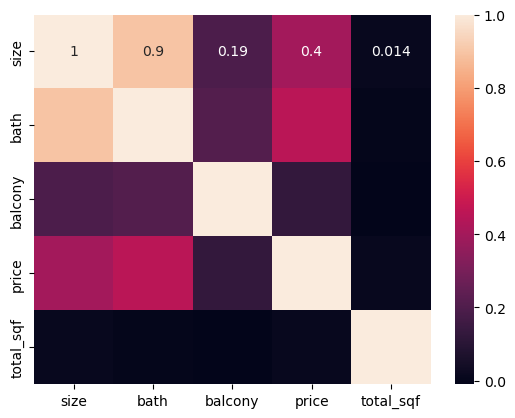

In [36]:
sns.heatmap(df.select_dtypes(include=['int','float']).corr(),annot=True)
plt.show()

In [37]:
## <-----------Handling Outliers--------->

num=df.select_dtypes(include=['float'])
num

,size,bath,balcony,price,total_sqf
0,2.0,2.0,1.0,39.07,1056.0
1,4.0,5.0,3.0,120.00,2600.0
2,3.0,2.0,3.0,62.00,1440.0
3,3.0,3.0,1.0,95.00,1521.0
4,2.0,2.0,1.0,51.00,1200.0
...,...,...,...,...,...
13315,5.0,4.0,0.0,231.00,3453.0
13316,4.0,5.0,2.0,400.00,3600.0
13317,2.0,2.0,1.0,60.00,1141.0
13318,4.0,4.0,1.0,488.00,4689.0


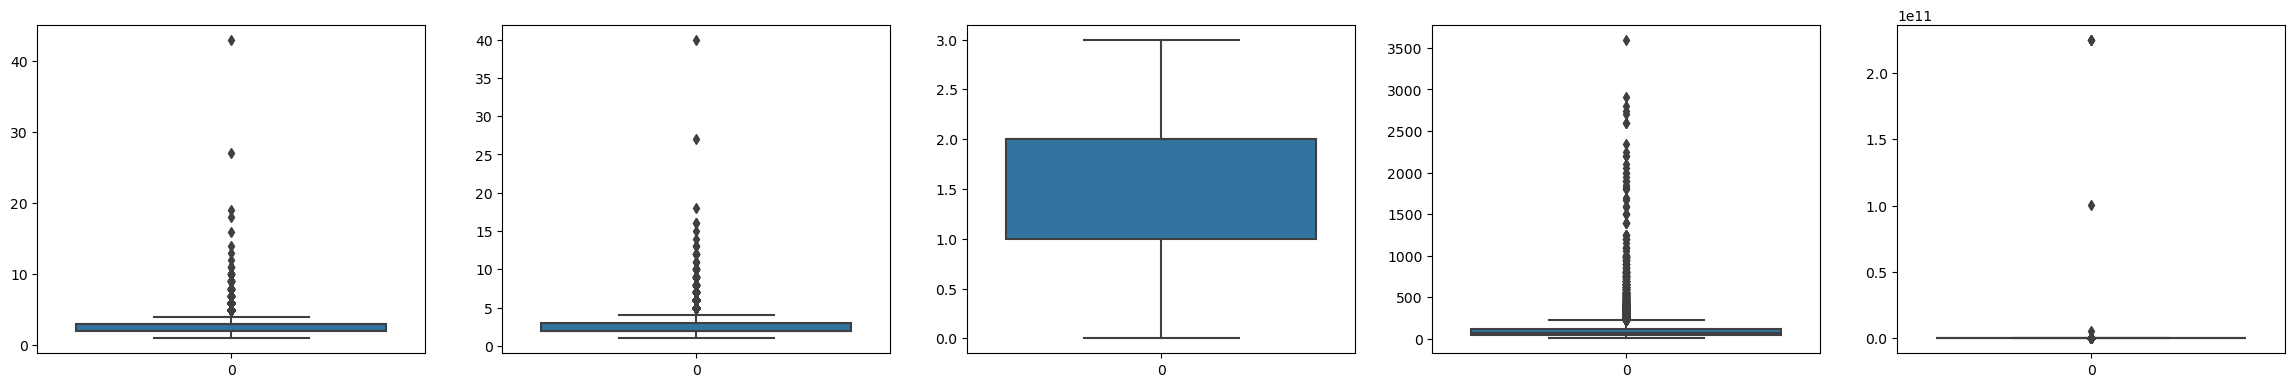

In [38]:
plt.figure(figsize=(35,35))
for i,var in enumerate(num):
    plt.subplot(7,6,i+1)
    sns.boxplot(num[var])

<Figure size 3000x3000 with 0 Axes>

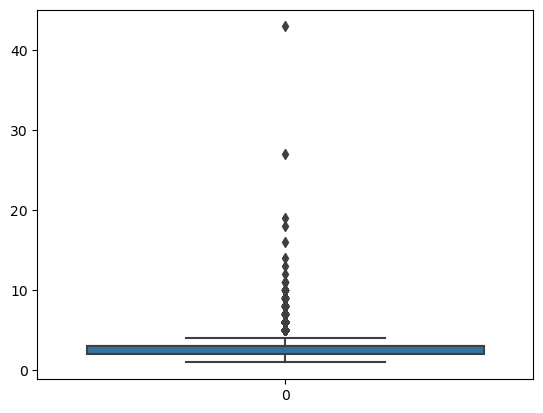

<Figure size 3000x3000 with 0 Axes>

In [39]:
## Removing Outliers of Size feature

sns.boxplot(df['size'])
plt.figure(figsize=(30,30))

In [40]:
Q1=df['size'].quantile(.25)
print("Q1:",Q1)
Q3=df['size'].quantile(.75)
print("Q3:",Q3)
IQR=Q3-Q1
print("IQR:",IQR)

Q1: 2.0
Q3: 3.0
IQR: 1.0


In [41]:
ll=Q1-(1.5*IQR)
ul=Q3+(1.5*IQR)
ll,ul

(0.5, 4.5)

In [42]:
df1=df[(df['size']>ll)&(df['size']<ul)] 
df1

,area_type,availability,location,size,bath,balcony,price,total_sqf
0,Super built-up Area,19-Dec,Electronic City Phase II,2.0,2.0,1.0,39.07,1056.0
1,Plot Area,Ready To Move,Chikka Tirupathi,4.0,5.0,3.0,120.00,2600.0
2,Built-up Area,Ready To Move,Uttarahalli,3.0,2.0,3.0,62.00,1440.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3.0,3.0,1.0,95.00,1521.0
4,Super built-up Area,Ready To Move,Kothanur,2.0,2.0,1.0,51.00,1200.0
...,...,...,...,...,...,...,...,...
13314,Super built-up Area,Ready To Move,Green Glen Layout,3.0,3.0,3.0,112.00,1715.0
13316,Super built-up Area,Ready To Move,Richards Town,4.0,5.0,2.0,400.00,3600.0
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2.0,2.0,1.0,60.00,1141.0
13318,Super built-up Area,18-Jun,Padmanabhanagar,4.0,4.0,1.0,488.00,4689.0


<Figure size 2000x2000 with 0 Axes>

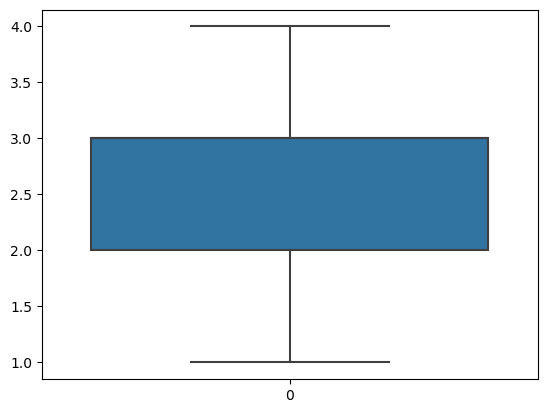

<Figure size 2000x2000 with 0 Axes>

In [43]:
sns.boxplot(df1['size'])
plt.figure(figsize=(20,20))

In [44]:
## Removing Outliers of bath feature

Q1=df['bath'].quantile(.25)
print("Q1:",Q1)
Q3=df['bath'].quantile(.75)
print("Q3:",Q3)
IQR=Q3-Q1
print("IQR:",IQR)

Q1: 2.0
Q3: 3.0
IQR: 1.0


In [45]:
ll=Q1-(1.5*IQR)
ul=Q3+(1.5*IQR)
ll,ul

(0.5, 4.5)

In [46]:
df2=df[(df['bath']>ll)&(df['bath']<ul)] 
df2

,area_type,availability,location,size,bath,balcony,price,total_sqf
0,Super built-up Area,19-Dec,Electronic City Phase II,2.0,2.0,1.0,39.07,1056.0
2,Built-up Area,Ready To Move,Uttarahalli,3.0,2.0,3.0,62.00,1440.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3.0,3.0,1.0,95.00,1521.0
4,Super built-up Area,Ready To Move,Kothanur,2.0,2.0,1.0,51.00,1200.0
5,Super built-up Area,Ready To Move,Whitefield,2.0,2.0,1.0,38.00,1170.0
...,...,...,...,...,...,...,...,...
13314,Super built-up Area,Ready To Move,Green Glen Layout,3.0,3.0,3.0,112.00,1715.0
13315,Built-up Area,Ready To Move,Whitefield,5.0,4.0,0.0,231.00,3453.0
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2.0,2.0,1.0,60.00,1141.0
13318,Super built-up Area,18-Jun,Padmanabhanagar,4.0,4.0,1.0,488.00,4689.0


<Figure size 500x500 with 0 Axes>

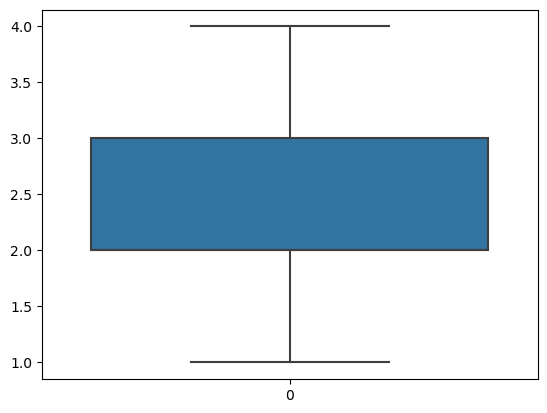

<Figure size 500x500 with 0 Axes>

In [47]:
sns.boxplot(df2['bath'])
plt.figure(figsize=(5,5))

In [48]:
## Removing Outliers of Price feature

Q1=df['price'].quantile(.25)
print("Q1:",Q1)
Q3=df['price'].quantile(.75)
print("Q3:",Q3)
IQR=Q3-Q1
print("IQR:",IQR)

Q1: 50.0
Q3: 120.0
IQR: 70.0


In [49]:
ll=Q1-(1.5*IQR)
ul=Q3+(1.5*IQR)
ll,ul

(-55.0, 225.0)

In [50]:
df3=df[(df['price']>ll)&(df['price']<ul)]
df3

,area_type,availability,location,size,bath,balcony,price,total_sqf
0,Super built-up Area,19-Dec,Electronic City Phase II,2.0,2.0,1.0,39.07,1056.0
1,Plot Area,Ready To Move,Chikka Tirupathi,4.0,5.0,3.0,120.00,2600.0
2,Built-up Area,Ready To Move,Uttarahalli,3.0,2.0,3.0,62.00,1440.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3.0,3.0,1.0,95.00,1521.0
4,Super built-up Area,Ready To Move,Kothanur,2.0,2.0,1.0,51.00,1200.0
...,...,...,...,...,...,...,...,...
13312,Super built-up Area,Ready To Move,Bellandur,2.0,2.0,2.0,47.00,1262.0
13313,Super built-up Area,Ready To Move,Uttarahalli,3.0,2.0,1.0,57.00,1345.0
13314,Super built-up Area,Ready To Move,Green Glen Layout,3.0,3.0,3.0,112.00,1715.0
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2.0,2.0,1.0,60.00,1141.0


<Figure size 200x200 with 0 Axes>

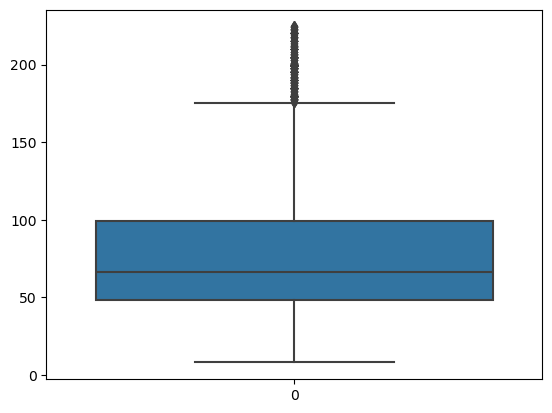

<Figure size 200x200 with 0 Axes>

In [51]:
sns.boxplot(df3['price'])
plt.figure(figsize=(2,2))

In [52]:
## Removing Outliers of total_sqf feature

Q1=df['total_sqf'].quantile(.25)
print("Q1:",Q1)
Q3=df['total_sqf'].quantile(.75)
print("Q3:",Q3)
IQR=Q3-Q1
print("IQR:",IQR)

Q1: 1100.0
Q3: 1703.0
IQR: 603.0


In [53]:
ll=Q1-(1.5*IQR)
ul=Q3+(1.5*IQR)
ll,ul

(195.5, 2607.5)

In [54]:
df4=df[(df['total_sqf']>ll)&(df['total_sqf']<ul)]
df4

,area_type,availability,location,size,bath,balcony,price,total_sqf
0,Super built-up Area,19-Dec,Electronic City Phase II,2.0,2.0,1.0,39.07,1056.0
1,Plot Area,Ready To Move,Chikka Tirupathi,4.0,5.0,3.0,120.00,2600.0
2,Built-up Area,Ready To Move,Uttarahalli,3.0,2.0,3.0,62.00,1440.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3.0,3.0,1.0,95.00,1521.0
4,Super built-up Area,Ready To Move,Kothanur,2.0,2.0,1.0,51.00,1200.0
...,...,...,...,...,...,...,...,...
13312,Super built-up Area,Ready To Move,Bellandur,2.0,2.0,2.0,47.00,1262.0
13313,Super built-up Area,Ready To Move,Uttarahalli,3.0,2.0,1.0,57.00,1345.0
13314,Super built-up Area,Ready To Move,Green Glen Layout,3.0,3.0,3.0,112.00,1715.0
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2.0,2.0,1.0,60.00,1141.0


<Figure size 1200x1200 with 0 Axes>

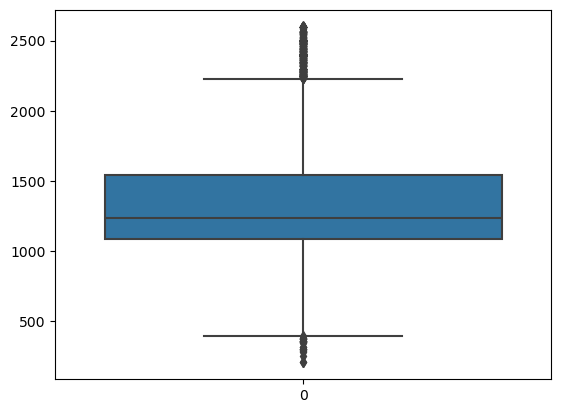

<Figure size 1200x1200 with 0 Axes>

In [55]:
sns.boxplot(df4['total_sqf'])
plt.figure(figsize=(12,12))

In [56]:
## <---------Encoding of Object Type Features-------->

In [57]:
df.select_dtypes(include=['object'])


,area_type,availability,location
0,Super built-up Area,19-Dec,Electronic City Phase II
1,Plot Area,Ready To Move,Chikka Tirupathi
2,Built-up Area,Ready To Move,Uttarahalli
3,Super built-up Area,Ready To Move,Lingadheeranahalli
4,Super built-up Area,Ready To Move,Kothanur
...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield
13316,Super built-up Area,Ready To Move,Richards Town
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar
13318,Super built-up Area,18-Jun,Padmanabhanagar


In [58]:
df['area_type'].value_counts()

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64

In [59]:
df['availability'].value_counts()

availability
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: count, Length: 81, dtype: int64

In [60]:
df['location'].value_counts()

location
Whitefield                        542
Sarjapur  Road                    399
Electronic City                   304
Kanakpura Road                    273
Thanisandra                       237
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: count, Length: 1294, dtype: int64

In [61]:
a=df4['location'].value_counts().sort_values(ascending=False)
a

location
Whitefield                   436
Sarjapur  Road               337
Electronic City              303
Kanakpura Road               254
Thanisandra                  217
                            ... 
Maruthi nagar kogilu           1
Electronic city phase 1,       1
Whitefield ECC Road            1
Kathreguppe                    1
Abshot Layout                  1
Name: count, Length: 1212, dtype: int64

In [62]:
b=a[a<=10]

In [63]:
df4['location']=df4['location'].apply(lambda a: 'other' if a in b else a)

In [64]:
df4['location'].value_counts()

location
other                 2697
Whitefield             436
Sarjapur  Road         337
Electronic City        303
Kanakpura Road         254
                      ... 
Pattandur Agrahara      11
Neeladri Nagar          11
Vishwapriya Layout      11
LB Shastri Nagar        11
Kadubeesanahalli        11
Name: count, Length: 224, dtype: int64

In [131]:
df5=pd.get_dummies(df4).astype(float)
df5

,size,bath,balcony,price,total_sqf,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,availability_14-Jul,...,location_Vijayanagar,location_Vishwapriya Layout,location_Vittasandra,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yeshwanthpur,location_other
0,2.0,2.0,1.0,39.07,1056.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.0,5.0,3.0,120.00,2600.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,3.0,2.0,3.0,62.00,1440.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.0,3.0,1.0,95.00,1521.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.0,2.0,1.0,51.00,1200.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13312,2.0,2.0,2.0,47.00,1262.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13313,3.0,2.0,1.0,57.00,1345.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13314,3.0,3.0,3.0,112.00,1715.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13317,2.0,2.0,1.0,60.00,1141.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [132]:
## <----------Training Data for Model------->

from sklearn.model_selection import train_test_split

In [133]:
x=df5.drop(columns='price')
y=df5['price']
y

0         39.07
1        120.00
2         62.00
3         95.00
4         51.00
          ...  
13312     47.00
13313     57.00
13314    112.00
13317     60.00
13319     17.00
Name: price, Length: 11937, dtype: float64

In [159]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=51)

In [160]:
x_train.shape

(9549, 312)

In [161]:
x_test.shape

(2388, 312)

In [162]:
y_train.shape

(9549,)

In [163]:
y_test.shape

(2388,)

In [164]:
from sklearn.ensemble import RandomForestRegressor

In [168]:
model=RandomForestRegressor()
model.fit(x_train,y_train)

RandomForestRegressor()

In [169]:
model.score(x_test,y_test)

0.5776002072128712

In [142]:
model.predict(x_test)

array([ 51.15544167,  43.3948499 , 155.54      , ...,  64.01665   ,
        48.36202273,  85.2094    ])